In [7]:
import pandas as pd
import numpy as np
import os
print(os.getcwd())

C:\Users\gkvku\OneDrive\Desktop\jupyter\spam classification


In [13]:
df = pd.read_csv(r"C:\Users\gkvku\Downloads\mail_data.csv", encoding='ISO-8859-1')

In [14]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data cleaning
# EDA
# Text Preprocessing
# Model Building
# evaluation
# improvement

## Data cleaning

In [16]:
# Prepocessing (Label encoder)

In [17]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [18]:
# Fit and transform the data
df['Category'] = label_encoder.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# Missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int32 
 1   Message   5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [21]:
# Duplicate values
duplicate_count = df.duplicated().sum()
duplicate_count

415

In [25]:
# Remove Duplicates
df = df.drop_duplicates(keep='first')
duplicate_count = df.duplicated().sum()
duplicate_count

0

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   int32 
 1   Message   5157 non-null   object
dtypes: int32(1), object(1)
memory usage: 100.7+ KB


In [27]:
df.shape

(5157, 2)

## EDA

In [29]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

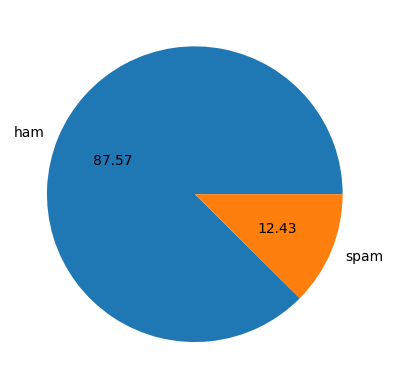

In [30]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [31]:
# Data is imbalnce

In [32]:
import nltk

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gkvku\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
df['num_characters'] = df['Message'].apply(len)

In [35]:
df.head(5)

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [37]:
# calculate the number of words in each message in the Message column
import re
df['num_words'] = df['Message'].apply(lambda x: len(re.findall(r'\b\w+\b', x)))

In [39]:
df.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14


In [40]:
# calculate the number of sentences in each message in the Message column
from nltk.tokenize import sent_tokenize
df['num_sentences'] = df['Message'].apply(lambda x: len(sent_tokenize(x)))

In [41]:
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1


In [42]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.228040,16.063991,1.969750
std,58.451149,11.574604,1.455526
min,2.000000,0.000000,1.000000
25%,36.000000,8.000000,1.000000
50%,61.000000,12.000000,1.000000
75%,118.000000,23.000000,2.000000
max,910.000000,190.000000,38.000000


In [43]:
# ham
df[df['Category']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.951063,14.715235,1.827724
std,56.730031,11.524002,1.394338
min,2.000000,0.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,53.000000,11.000000,1.000000
75%,91.000000,19.000000,2.000000
max,910.000000,190.000000,38.000000


In [44]:
# spam
df[df['Category']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.541342,25.566303,2.970359
std,30.516111,6.257425,1.485575
min,7.000000,1.000000,1.000000
25%,132.000000,24.000000,2.000000
50%,148.000000,27.000000,3.000000
75%,157.000000,29.000000,4.000000
max,224.000000,40.000000,9.000000


In [45]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

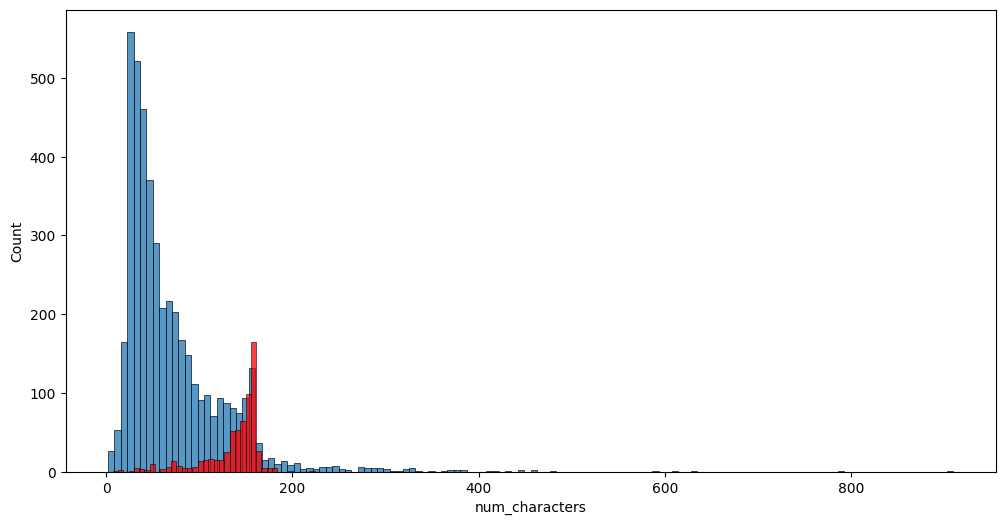

In [46]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==0]['num_characters'])
sns.histplot(df[df['Category']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

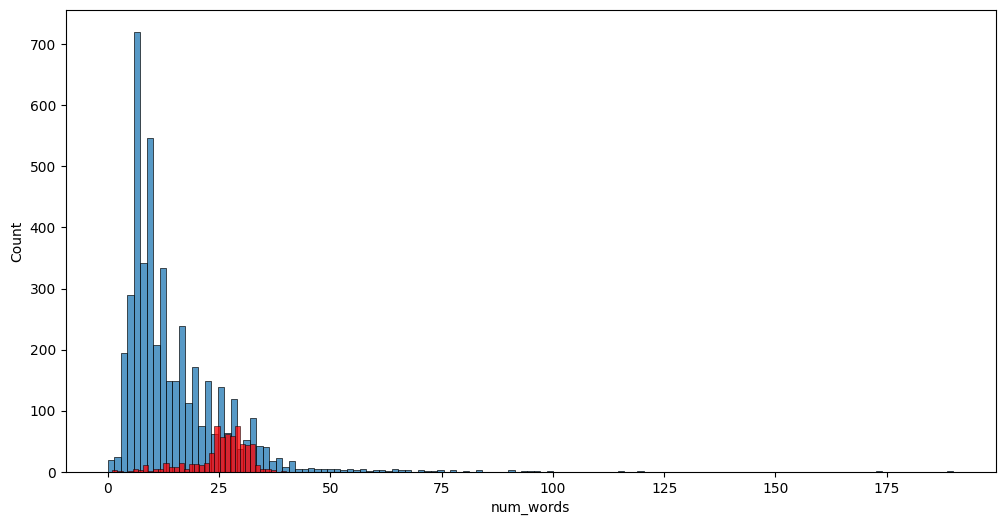

In [47]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==0]['num_words'])
sns.histplot(df[df['Category']==1]['num_words'],color='red')

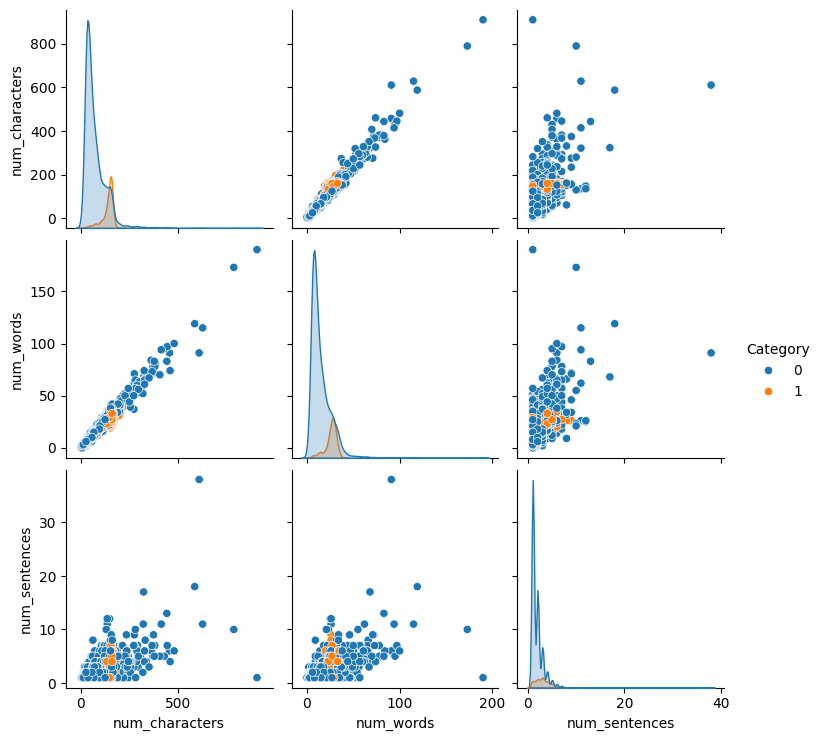

In [48]:
sns.pairplot(df,hue='Category')
# A pair plot visualizes pairwise relationships between numerical features in a dataset.
# It generates scatter plots for each pair of features and histograms (or kernel density plots) for the distribution of individual features.

<Axes: >

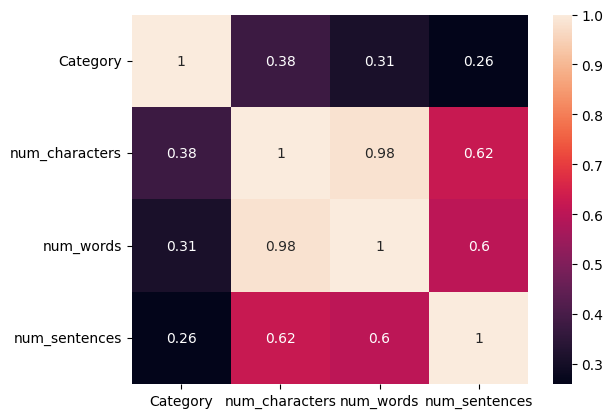

In [49]:
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(),annot=True)

## 3.Data Preprocessing
# > Lower case
# > Tokenization¶
# > Remove special characters
# > Reoving stop words and punctuation
# > stemming

In [51]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [52]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gkvku\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gkvku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [55]:
# Define preprocessing function
def preprocess_Message(Message):
    # Convert to lowercase
    Message = Message.lower()
    
    # Tokenization
    tokens = word_tokenize(Message)
    
    # Remove special characters and punctuation
    tokens = [word for word in tokens if word.isalnum()]
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]
    
    return " ".join(tokens)

# Apply preprocessing to the 'Message' column
df['Processed_Message'] = df['Message'].apply(preprocess_Message)

In [56]:
# Chceking the code
preprocess_Message("But I'll b going 2 sch on mon. My sis need 2 take smth.")

'b go 2 sch mon si need 2 take smth'

In [57]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,Processed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1,nah think goe usf live around though


In [60]:
from wordcloud import WordCloud
# Create a WordCloud for ham
wordcloud = WordCloud(width=800, height=800,min_font_size=10, background_color='white')
spam_wc = wordcloud.generate(df[df['Category']==1]['Processed_Message'].str.cat(sep=" "))

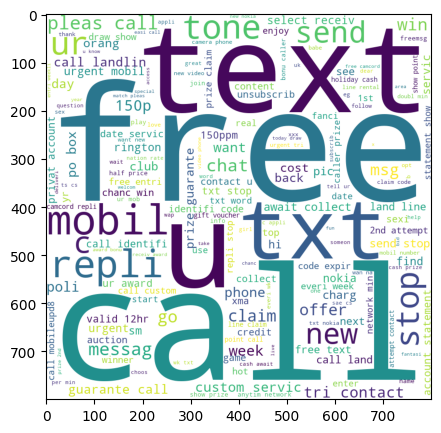

In [61]:
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc)

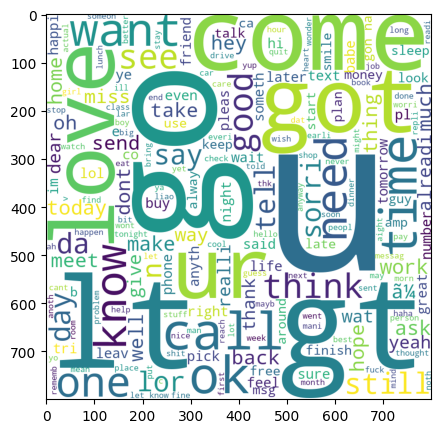

In [62]:
# Create a WordCloud for spam
wordcloud = WordCloud(width=800, height=800,min_font_size=10, background_color='white')
spam_wc = wordcloud.generate(df[df['Category']==0]['Processed_Message'].str.cat(sep=" "))
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc)

In [65]:
spam_corpus = []
for msg in df[df['Category'] == 1]['Processed_Message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [66]:
  len(spam_corpus)

9774

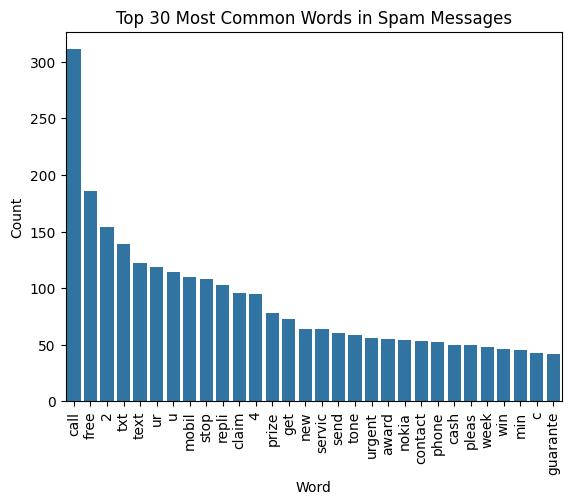

In [67]:
from collections import Counter
import random
# Get the 30 most common words and their counts
common_words = Counter(spam_corpus).most_common(30)

# Convert to a DataFrame
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in range(len(common_words_df))]

# Plot using seaborn
sns.barplot(x='Word', y='Count', data=common_words_df)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Spam Messages")
plt.show()

# 4.Model Building

In [69]:
# Naive
# need to convert text to number using bag of word(BoW)
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

# Fit and transform the text data into vectors
X = tfidf.fit_transform(df['Processed_Message']).toarray()


In [70]:
X.shape

(5157, 3000)

In [71]:
y=df['Category'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [73]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [74]:
gnb.fit(X_train, y_train)
# Predict on the test data
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8682170542635659
[[787 118]
 [ 18 109]]
0.4801762114537445


In [75]:
mnb.fit(X_train, y_train)
# Predict on the test data
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9728682170542635
[[905   0]
 [ 28  99]]
1.0


In [76]:
bnb.fit(X_train, y_train)
# Predict on the test data
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835271317829457
[[903   2]
 [ 15 112]]
0.9824561403508771


In [77]:
# tfidf---> mnb

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# Dictionary of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# Function to evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = []
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on the test data
        y_pred = model.predict(X_test)
        
        # Calculate accuracy and precision
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        
        # Store results
        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Confusion Matrix': conf_matrix,
            'Precision': precision
        })
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Evaluate all models
results_df = evaluate_models(models, X_train, X_test, y_train, y_test)

# Display results
print(results_df)


                 Model  Accuracy       Confusion Matrix  Precision
0  Logistic Regression  0.958333   [[902, 3], [40, 87]]   0.966667
1          Naive Bayes  0.972868   [[905, 0], [28, 99]]   1.000000
2                  SVM  0.973837  [[905, 0], [27, 100]]   1.000000
3        Random Forest  0.971899   [[905, 0], [29, 98]]   1.000000
4                  KNN  0.912791   [[905, 0], [90, 37]]   1.000000


In [84]:
results_df = results_df.sort_values(by='Accuracy', ascending=False)
results_df

,Model,Accuracy,Confusion Matrix,Precision
2,SVM,0.973837,"[[905, 0], [27, 100]]",1.000000
1,Naive Bayes,0.972868,"[[905, 0], [28, 99]]",1.000000
3,Random Forest,0.971899,"[[905, 0], [29, 98]]",1.000000
0,Logistic Regression,0.958333,"[[902, 3], [40, 87]]",0.966667
4,KNN,0.912791,"[[905, 0], [90, 37]]",1.000000


In [85]:
results_df = results_df.sort_values(by='Precision', ascending=False)
results_df

,Model,Accuracy,Confusion Matrix,Precision
2,SVM,0.973837,"[[905, 0], [27, 100]]",1.000000
1,Naive Bayes,0.972868,"[[905, 0], [28, 99]]",1.000000
3,Random Forest,0.971899,"[[905, 0], [29, 98]]",1.000000
4,KNN,0.912791,"[[905, 0], [90, 37]]",1.000000
0,Logistic Regression,0.958333,"[[902, 3], [40, 87]]",0.966667


In [86]:
 results_df = results_df.sort_values(by='Accuracy', ascending=False)
best_model_table = results_df.reset_index(drop=True)
best_model_table

,Model,Accuracy,Confusion Matrix,Precision
0,SVM,0.973837,"[[905, 0], [27, 100]]",1.000000
1,Naive Bayes,0.972868,"[[905, 0], [28, 99]]",1.000000
2,Random Forest,0.971899,"[[905, 0], [29, 98]]",1.000000
3,Logistic Regression,0.958333,"[[902, 3], [40, 87]]",0.966667
4,KNN,0.912791,"[[905, 0], [90, 37]]",1.000000
